<a href="https://colab.research.google.com/github/LeDinhHung2211/AI_NeuralNmetwork/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout


In [ ]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
#reshape kích thước
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test = X_test.reshape(-1,3072)


In [ ]:
#chuẩn hóa 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255


In [ ]:
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [ ]:
# buid model ANN
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])


Epoch 1/500
313/313 [==============================] - 7s 11ms/step - loss: 2.1232 - accuracy: 0.2321 - val_loss: 2.0399 - val_accuracy: 0.2613
Epoch 2/500
313/313 [==============================] - 3s 10ms/step - loss: 1.8992 - accuracy: 0.3118 - val_loss: 1.8683 - val_accuracy: 0.3067
Epoch 3/500
313/313 [==============================] - 3s 9ms/step - loss: 1.8302 - accuracy: 0.3395 - val_loss: 1.7499 - val_accuracy: 0.3794
Epoch 4/500
313/313 [==============================] - 3s 11ms/step - loss: 1.7761 - accuracy: 0.3598 - val_loss: 1.8949 - val_accuracy: 0.3039
Epoch 5/500
313/313 [==============================] - 3s 10ms/step - loss: 1.7394 - accuracy: 0.3753 - val_loss: 1.7281 - val_accuracy: 0.3653
Epoch 6/500
313/313 [==============================] - 3s 11ms/step - loss: 1.7119 - accuracy: 0.3850 - val_loss: 1.6546 - val_accuracy: 0.4221
Epoch 7/500
313/313 [==============================] - 3s 10ms/step - loss: 1.6882 - accuracy: 0.3965 - val_loss: 1.7085 - val_accuracy: 

In [ ]:
#in sai số và độ chính xác
score = model.evaluate(X_test,y_test,verbose=0)
print('Loss ',score[0])
print('Acc ',score[1])


Loss  1.5268276929855347
Acc  0.47999998927116394


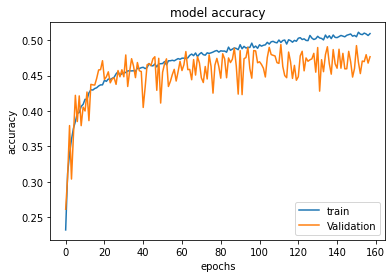

In [ ]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()


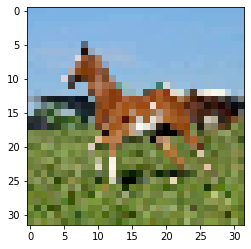

con ngua


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/conngua.jpg"

img = load_img(filename,target_size=(32,32))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255

kq = np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("may bay");
if(kq==1):
    print("xe hoi");
if(kq==2):
    print("con chim");
if(kq==3):
    print("con meo");
if(kq==4):
    print("con huou");
if(kq==5):
    print("con cho");
if(kq==6):
    print("con ech");
if(kq==7):
    print("con ngua");
if(kq==8):
    print("may tau");
if(kq==9):
    print("xe tai");
    